In [5]:
import numpy as np
import matplotlib.pyplot as plt 

# Discrete Fourier Transform in Python using NumPy
___
_Note: The vectors and matrices that appear in this notebook are 0-indexed. This makes life easier_    
The discrete Fourier transform of a vector $y$ with $n$ elements is the vector $c$ such that $y = Fc$, where $F$ is the Fourier matrix of order $n$.   
   
The Fourier matrix is a symmetric matrix whose elements are given by
$F_{ij} = \omega^{ij},\;\;\omega = e^{i\frac{2\pi}{n}}$   
The vector $c$ contains the fourier coefficients, ie $c_k$ is the amplitude of $e^{i\frac{2k\pi}{n}}$ in $y$   
When written explicitly, the Fourier matrix is of the form 
$$
F = \;\begin{bmatrix}
       1 & 1 & 1 & \dots & 1 \\
       1 & \omega & \omega^2 & \dots & \omega^{n-1} \\
       1 & \omega^2 & \omega^4 & \dots & \omega^{2(n-1)} \\
       \vdots & \vdots & \vdots & \ddots &  \\
       1 & \omega^{n-1} & \omega^{2(n-1)} & \dots & \omega^{(n-1)^2} \\
       \end{bmatrix}
$$
We would like to find $ c = F^{-1}y$   
Fortunately for us, this is easily done as $F^{-1} = \frac{1}{n} F^{*}$   
Notice that   
$F_{ij} = \cos(\frac{2\pi ij}{n}) + i\sin(\frac{2\pi ij}{n})$  and 
   
$F^{-1}_{ij} = \frac{1}{n}(\cos(\frac{2\pi ij}{n}) - i\sin(\frac{2\pi ij}{n}))$   
   
This allows us to split $F^{-1}$ as follows
$$
F^{-1} = \frac{1}{n}\;\begin{bmatrix}
       1 & 1 & 1 & \dots & 1 \\
       1 & \cos(\frac{2 \pi}{n}) & \cos(\frac{4 \pi}{n}) & \dots & \cos(\frac{2(n-1) \pi}{n}) \\
       1 & \cos(\frac{4 \pi}{n}) & \cos(\frac{8 \pi}{n}) & \dots & \cos(\frac{4(n-1) \pi}{n}) \\
       \vdots & \vdots & \vdots & \ddots &  \\
       1 & \cos(\frac{2(n-1) \pi}{n}) & cos(\frac{4(n-1) \pi}{n}) & \dots & cos(\frac{(n-1)^2 \pi}{n}) \\
       \end{bmatrix}
       \;\;-\frac{1}{n}\;\; i
       \begin{bmatrix}
       0 & 0 & 0 & \dots & 0 \\
       0 & \sin(\frac{2 \pi}{n}) & \sin(\frac{4 \pi}{n}) & \dots & \sin(\frac{2(n-1) \pi}{n}) \\
       0 & \sin(\frac{4 \pi}{n}) & \sin(\frac{8 \pi}{n}) & \dots & \sin(\frac{4(n-1) \pi}{n}) \\
       \vdots & \vdots & \vdots & \ddots &  \\
       0 & \sin(\frac{2(n-1) \pi}{n}) & \sin(\frac{4(n-1) \pi}{n}) & \dots & \sin\frac{(n-1)^2 \pi}{n}) \\
       \end{bmatrix}
$$
<br>  
For the sake of brevity, we write the above as  
$$
F^{-1} = F_1 + iF_2\\
c = F^{-1}y = F_1y + iF_2y
$$
   
$c$ is a complex vector, but the real part is solely due to the cosine matrix $F_1$ and the imaginary part is solely due to the sine matrix $F_2$   
Thus, the amplitudes of $\cos(\frac{2 \pi k}{n})$  and $\sin(\frac{2 \pi k}{n})$ are given by the real and imaginary parts of $c_k$ respectively.   
Our problem of finding the fourier coefficients has been reduced to the multiplication of a matrix and a vector which is completed in $O(n^2)$   
Let us proceed to coding this "slow" Fourier transform in python

In [6]:
def slow_ft(y): # y is the array of function values
    n = len(y)
    omega = np.exp(0+2*np.pi/n*1j)
    c = []
    for i in range(n):
        c.append(0)
        for j in range(n):
            c[-1] += omega**(-i*j)*y[j]
    cos_coeffs = np.array([coeff.real for coeff in c])/n
    sine_coeffs = np.array([coeff.imag for coeff in c])/n
    return (cos_coeffs, sine_coeffs)

To test our function, let us try to approximate $y= e^{-|x|}$, $-5 \leq x \leq 5$

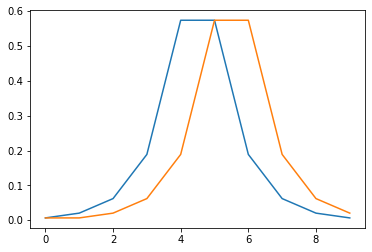

In [8]:
x = np.linspace(-5,5,10) # Get 10 evenly spaced points between -5 and 5 inclusive
y = np.exp(-abs(x))
c = slow_ft(y)
plt.plot(y) # Plot the y values. When no x-values are provided matplotlib assumes x = 0,1,2,....
n = len(y)
y_app = np.zeros(y.shape) # initialize the approximation to zeros
x_0 = np.arange(n)
for i in range(0, n):
    y_app += np.cos(2*np.pi/n*i*(x_0))*c[0][i]
    y_app += np.sin(2*np.pi/n*i*(x_0))*c[1][i]
plt.plot(y_app)
plt.show()

But alas! The graph seems to be shifted in the x direction! What's wrong here?